<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe5_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.-Problema

Entrada: Un arreglo de n elementos.

Salida: Un arreglo con la misma cantidad de elementos que el arreglo de entrada.




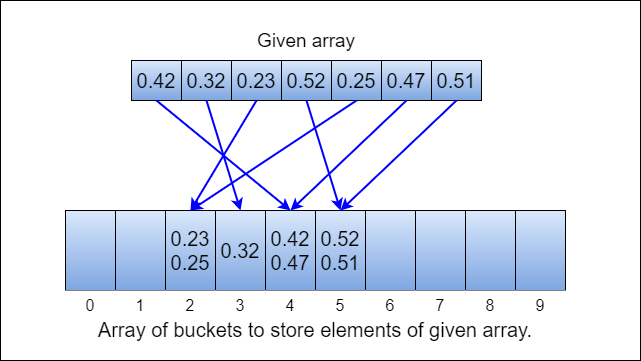

El problema se basa en el ordenamiento de menor a mayor de un arreglo de n elementos en la cual incluye el ordenamiento de elementos entre [0,1) y arreglos enteros.

#2.- Descripción del algoritmo Bucketsort

Este algoritmo se basa en el ordenamiento de un arreglo con elementos que van de rango[0,1) en el cual crea unos "buckets" que son casillas en las cual tiene unos rangos, estos rangos en esta implementación se definen según el tamaño que tiene nuestro arreglo de entrada por lo que utilizaremos 10 elementos, un ejemplo del rango de nuestro bucket es de [0.1 a 0.2], luego a estos "buckets" son ordenados de menor a mayor, en nuestro caso se utilizara InsertionSort, pero también se pueden usar otros tipos de algoritmos, luego nuestros buckets creados se ingresan los elementos dependiendo a qué rango de valor que correspondan, luego estos son ingresados en el arreglo de entrada, pero en nuestro caso para una mejor visualización con la variable verbose==True se insertara en una lista los elementos, esto no afecta al resultado.

**2.1 Implementación del algoritmo**

A continuación la implementación del algoritmo Bucketsort complementado con InsertionSort

In [6]:
from termcolor import colored

def InsertionSort(array,verbose=False):
  iteraciones=0
  for i in range(1,len(array)):
    key = array[i]
    paso=0
    a=0
    
    
    if verbose==True:
       print("pasada",i)
       salir=0

    for k in range(i-1,-1,-1):
        
        
        if array[k]>key: #condicion que compara la clave con las pocisiones que estan a su izquierda
            iteraciones+=1
            #intercambio de posiciones
            array[k+1]=array[k] 
            array[k]=key
            if verbose==True:
              print(str(array[:k])[1:-1],",",colored(f"{str(array[k:k+2])[1:-1]}","green"),",",str(array[k+2:])[1:-1])
              paso+=1
            else:
              paso+=1
        if verbose==True and paso==0: ##condicion que retorna cuando el arreglo completo ya esta ordenado
          if salir==1 and i==len(array)-1:
            return array,iteraciones

          if salir==0: #muestra el subarreglo cuando ya esta ordenado
            print(str(array)[1:-1])

          salir+=1
        if paso==0:#condicion para salir si esta ordenado ya el subarreglo
          a+=1
          if a==1:
            
            break
        
          

    if key<array[0]:
        array[0]=key  
        
  
  return array


def bucketSort(array,verbose):
    bucket = []
    arreglo=[]
    # crear buckets vacios
    for i in range(len(array)):
        bucket.append([])
    if verbose==True:

        print("rango de buckets")
        print("  0   1   2   3   4   5   6   7   8   9")
        print(bucket,"\n")

    # insertar el elemento a su bucket correspondiente 
    for j in array:
        index_b = int(10 * j)
        bucket[index_b].append(j)
        if verbose==True:print(bucket)

    # ordenar los elementos dentro del bucket
    for i in range(len(array)):
        bucket[i] = InsertionSort(bucket[i])

    if verbose==True:print(bucket)

    
   #ingresar elementos de los buckets en orden en el arrelgo
    for i in range(len(array)):
        for j in range(len(bucket[i])):
            arreglo.append(bucket[i][j])
            if verbose==True:print(arreglo)
 
    
    return arreglo


array =  [0.42, 0.52, 0.37, 0.32,0.51,0.38,0.74,0.65,0.93,0.21]
print("arreglo ordenado con BucketSort")
verbose=False
print(bucketSort(array,verbose))

arreglo ordenado con BucketSort
[0.21, 0.32, 0.37, 0.38, 0.42, 0.51, 0.52, 0.65, 0.74, 0.93]


**2.2 Ejemplo**

Arreglo=$[0.88, 0.42, 0.85, 0.55, 0.42, 0.61, 0.32, 0.78, 0.87, 0.54]$

se crean los buckets con sus rangos

$[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9]]$

se ingresan los elementos a su respectivo bucket según el rango que le corresponda

$[[], [], [], [], [], [], [], [], [0.88], []]$

$[[], [], [], [], [0.42], [], [], [], [0.88], []]$

$[[], [], [], [], [0.42], [], [], [], [0.88, 0.85], []]$

............

$[[], [], [], [0.32], [0.42, 0.42], [0.55, 0.54], [0.61], [0.78], [0.88, 0.85, 0.87], []]$

luego estos "buckets" se ordenan de menor a mayor

[[], [], [], [0.32], [0.42, 0.42], **[0.54, 0.55]**, [0.61], [0.78], **[0.85, 0.87, 0.88]**, []]

Luego se ingresan en orden al arreglo

$[0.32, 0.42, 0.42, 0.54, 0.55, 0.61, 0.78, 0.85, 0.87, 0.88]$

¡Ya está ordenado!




**2.3 verbose=True**

A continuación se mostrará el paso a paso que realiza el algoritmo bucketsort


In [5]:
import random

arreglo=[]
i=0
for i in range(10):
  x=round(random.uniform(0,0.99), 2)
  arreglo.append(x)
print(arreglo)
kekw=bucketSort(arreglo,verbose=True)
print(kekw)


[0.74, 0.4, 0.31, 0.52, 0.87, 0.06, 0.14, 0.91, 0.25, 0.29]
rango de buckets
  0   1   2   3   4   5   6   7   8   9
[[], [], [], [], [], [], [], [], [], []] 

[[], [], [], [], [], [], [], [0.74], [], []]
[[], [], [], [], [0.4], [], [], [0.74], [], []]
[[], [], [], [0.31], [0.4], [], [], [0.74], [], []]
[[], [], [], [0.31], [0.4], [0.52], [], [0.74], [], []]
[[], [], [], [0.31], [0.4], [0.52], [], [0.74], [0.87], []]
[[0.06], [], [], [0.31], [0.4], [0.52], [], [0.74], [0.87], []]
[[0.06], [0.14], [], [0.31], [0.4], [0.52], [], [0.74], [0.87], []]
[[0.06], [0.14], [], [0.31], [0.4], [0.52], [], [0.74], [0.87], [0.91]]
[[0.06], [0.14], [0.25], [0.31], [0.4], [0.52], [], [0.74], [0.87], [0.91]]
[[0.06], [0.14], [0.25, 0.29], [0.31], [0.4], [0.52], [], [0.74], [0.87], [0.91]]
[[0.06], [0.14], [0.25, 0.29], [0.31], [0.4], [0.52], [], [0.74], [0.87], [0.91]]
[0.06]
[0.06, 0.14]
[0.06, 0.14, 0.25]
[0.06, 0.14, 0.25, 0.29]
[0.06, 0.14, 0.25, 0.29, 0.31]
[0.06, 0.14, 0.25, 0.29, 0.31, 0.4]
[0.0

# 3.- Correctitud BucketSort

**3.1 Teorema correctitud BucketSort**

Entra un arreglo de n elementos que está en el rango $[0,1) [0.32,0.76,0.21,0.n]$ y sale un arreglo con la misma cantidad n de elementos pero ordenados de menor a mayor

**3.2 Prueba del teorema**

Para poder comprobar cuál es la correctitud de nuestro algoritmo bucketsort vamos a considerar 2 elementos del arreglo de entrada $array[i]$ y $array[j]$ asumiendo que $array[i]$ es <= a $array[j]$, esto genera dos casos, el caso que $array[i]$ sea igual a $array[j]$ y que $array[i]$ sea menor a $array[j]$.

**Caso $array[i]==array[j]$:**

Al ser los dos elementos iguales, estos se ingresan en la misma cubeta o bucket, ya que al ser iguales estas tienen el mismo rango, luego son ordenadas con el insertion sort, por lo que $array[i]$ aparece antes en la salida que $array[j]$ dado que el algoritmo BucketSort es un algoritmo estable.

**Caso $array[i]<array[j]$:**

Al ser los elementos $array[i]$ != de $array[j]$ estos se ingresarán en cubetas diferentes y como $array[i] < array[j]$ en la salida aparece primero $array[i]$, al estar en cubetas diferentes se puede suponer que estar ordenados, ya que si todas las cubetas solo tuvieran 1 elementos estas están ordenadas por lo
Bucket sort es correcto.

# 4.- Análisis de algoritmo

**4.1 Teorema**

El algoritmo bucketsort tiene un tiempo lineal en su caso promedio $O(n)$

**4.2 Prueba del teorema**

El tiempo que tiene Bucket sort sin contar insertion sort es lineal, por lo que hay que tomar en cuenta las llamadas que genera el algoritmo InsertionSort por lo que tomando en cuenta sus respectivos tiempos queda la siguiente ecuación:

$T(n)= O(n)+  \sum_{i=0}^{n-1}O({n_{i}}^{2})$

se toman los valores esperados de ambos lados

$E[T(n)]= E[O(n) + \sum_{i=0}^{n-1}O({n_{i}}^{2})]$

$= E[O(n)] + \sum_{i=0}^{n-1} E[O({n_{i}}^{2})]$

$= O(n) + \sum_{i=0}^{n-1} O(E[{n_{i}}^{2}])$

Ahora tenemos que hacer que la ecuación $E[{n_{i}}^{2}]$ no dependa de i en la cual vamos a elegir una variable aleatoria $X{ij}$ el cual tendrá un valor de $1$ con probabilidad de $1/n$ y en caso contrario el valor $0$ por lo que:

$E[{X_{ij}}^{2}] = 1^2 * 1/n + 0^2 *(1-1/n) = 1/n$

En el cual cuando $j \neq k$ $X_{ij}X_{ik}$ serán independientes, entonces:

$E[X_{ij}X_{ik}] = E[X_{ij}]*E[X_{ik}]$

$= 1/n * 1/n$

$= 1/n^2$

Entonces:

$E[{n_{i}}^{2}] = n*(1/n) + 2*(n(n-1)/2) * (1/n^2)$

$E[{n_{i}}^{2}] = 2-1/n$

Ahora con este resultado podemos remplazar en la ecuación del principio:

$= O(n) + \sum_{i=0}^{n-1} O(2-1/n)$

$= O(n) + n O(2-1/n)$

$= O(n) + n O(n)$

$= O(n)$

# 5.- Experimentos

**5.1 Experimento 1**

En este experimento compararemos el tiempo de ejecución de nuestro algoritmo BucketSort vs RadixSort y CountingSort.

Para esto tenemos que implementar nuestro algoritmo de forma que pueda admitir enteros, de igual forma tenemos que implementar los algoritmos countingsort y radixsort el cual son los siguientes:


In [15]:
def bucket_sort_3(input_list):
    # Find maximum value in the list and use length of the list to determine which value in the list goes into which bucket 
    max_value = max(input_list)
    size = max_value/len(input_list)

    # Create n empty buckets where n is equal to the length of the input list
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    # poner elementos dependiendo al bucket que corresponda
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    # ordenar elementos de los buckets usando insertion sort
    for z in range(len(input_list)):
        InsertionSort(buckets_list[z])
            
   
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

In [18]:
def countingSort(array):
    size = len(array)
    output = [0] * size

   
    count = [0] * 1000

   
    for i in range(0, size):
        count[array[i]] += 1

    
    for i in range(1, 1000):
        count[i] += count[i - 1]


    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1

   
    for i in range(0, size):
        array[i] = output[i]


In [19]:
def countingSortRad(array, place):
    size = len(array)
    output = [0] * size
    count = [0] * 10

   
    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1

    
    for i in range(1, 10):
        count[i] += count[i - 1]

    
    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]



def radixSort(array):
    # obtener maximo elemento
    max_element = max(array)

    
    place = 1
    while max_element // place > 0:
        countingSortRad(array, place)
        place *= 10

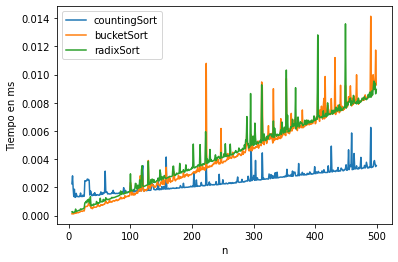

In [17]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y,y1,y2 = [],[],[],[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  
  t = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({a})", repeat=1, number=10)
  j = repeat(setup="from __main__ import bucket_sort_3", stmt=f"bucket_sort_3({a})", repeat=1, number=10)
  k = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)
  y2.append(k)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["countingSort","bucketSort","radixSort"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Observaciones y análisis**

Se puede observar que los algoritmos radixsort y bucketsort son más eficientes en el rango de problema de 100 elementos, pero cuanto más grande el problema menos eficientes son estos algoritmos, por lo que en conclusión si se quiere ordenar arreglos muy grandes es mucho más eficiente utilizar el counting sort.


**5.2 Experimento 2**

En este experimento se verá si es que existe una diferencia en nuestro algoritmo Bucketsort en su tiempo de ejecución cuando ordena arreglos con elementos tipo int y cuando ordena elemento tipo float en rango [0,1)

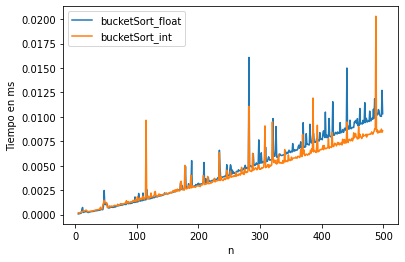

In [22]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x,y1,arreglo,y2 = [],[],[],[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  
  b= round(random.uniform(0,0.99), 2)
  arreglo.append(b)
  j = repeat(setup="from __main__ import bucket_sort_3", stmt=f"bucket_sort_3({arreglo})", repeat=1, number=10)
  


  k = repeat(setup="from __main__ import bucket_sort_3", stmt=f"bucket_sort_3({a})", repeat=1, number=10)

  x.append(n)
 
  y1.append(j)
  y2.append(k)
  



plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["bucketSort_float","bucketSort_int"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Observaciones y análisis**

Se puede observar que la diferencia entre ellos en los primeros problemas de tamaño 200 no es significativa, pero cuando sobrepasa este tamaño si empieza a despegar esta diferencia y una razón de esto puede ser la cantidad de números repetidos que hay en los buckets de los arreglos float, en cambio, en los int hay una mayor rango(1,1000) por lo que la cantidad de números repetidos es menos probable.